<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

----
# Diffusion-limited aggregation: random walk
In this notebook, we explore the simple growth model of
**diffusion-limited aggregation**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import ipywidgets as widgets
from ipywidgets import interactive,fixed
import libpyRANDOM

n_colors = 20
cmap = plt.get_cmap('tab20', n_colors)

In [2]:
nx = 51; ny =51
X,Y,matrix = libpyRANDOM.dlaCreateGrid(nx,ny)
matrix = libpyRANDOM.dlaCreateBC(nx,ny,matrix)

----
## Random walks

Place a random point in domain and let the point move around with a **random walk**.

**Note:** As point can leave the defined domain, we need to take care what should happen then ...

Our task for the function:
- Define `weights` as array to weight random direction. The pre-defined array `[25,25,25,25]` defines
equal weights for the directions **left**, **top**, **Right**, and **bottom**.
- open `points` array for coordinates of random walk, with number of walks `npoints` and number
of steps per walk `nsteps` given.
- Loop over the number of walks `npoints`:
    - define start position of random walk as **first** point in list `points`
    - get uniformly distributed random number for direction, apply `weights`
    - update position
    

In [3]:
def dlaRandomWalk(X,Y,matrix,npoints=3,nsteps=1000,seed=12,**kwargs):
    """
    Diffusion-limited aggregation
    create random walks
    input:
      X,Y       - 2D arrays of coordinates
      matrix    - 2D array of state of grid points
      npoints   - number of random points inserted
      nsteps    - number of steps per random point
    output:
      points    - list of random pathes
    """
    # define weights for left,top,right,bottom direction
    weights = [25,25,25,25]
    for i in kwargs:
        if (i=='weights'): weights = kwargs[i]
    if (sum(weights)>100): sys.exit('weights > 100') 
    # get dimensions from coordinate array
    nx = X.shape[0]; ny = X.shape[1]
    # initialize random point list
    points = np.zeros(2*npoints*nsteps).reshape(npoints,nsteps,2)
    # create random-number generator
    rng = np.random.default_rng(seed=seed)
    # loop over random walks
    for ipoint in range(npoints):
        # create random point as start
        i = rng.integers(int(0.1*nx),int(0.9*nx))
        j = rng.integers(int(0.1*ny),int(0.9*ny))
        points[ipoint,0,0] = X[i,j]
        points[ipoint,0,1] = Y[i,j]
        # step forward in radndom direction
        for istep in range(1,nsteps):
            decide = rng.uniform()*100
            if (decide < weights[0]):
                i = i -1
                if (i < 0): i=0
            elif (decide < weights[0]+weights[1]):
                j = j +1
                if (j > ny-1): j = ny-1
            elif (decide < weights[0]+weights[1]+weights[2]):
                i = i +1
                if (i > nx-1): i = nx-1
            else:
                j = j -1
                if (j < 0): j=0
            points[ipoint,istep,0] = X[i,j]
            points[ipoint,istep,1] = Y[i,j]
    # plot all random walks
    cbar1=plt.imshow(matrix,origin='lower',extent=(-1,1,-1,1),cmap='jet',alpha=0.3)
    plt.colorbar(cbar1)
    for ipoint in range(npoints):
        plt.plot(points[ipoint,0,0],points[ipoint,0,1],marker='x',alpha=0.5,color=cmap(ipoint))
        plt.plot(points[ipoint,:,0],points[ipoint,:,1],alpha=0.5,color=cmap(ipoint))
    return points

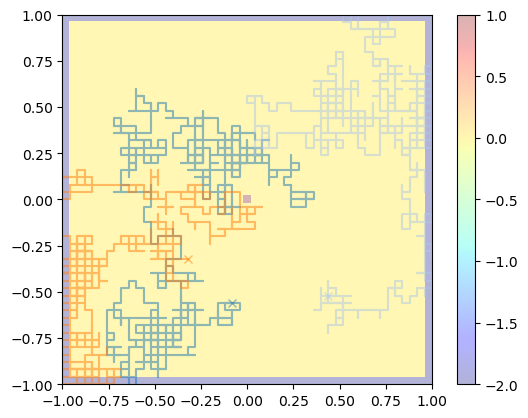

In [4]:
points = dlaRandomWalk(X,Y,matrix,npoints=3,seed=111)

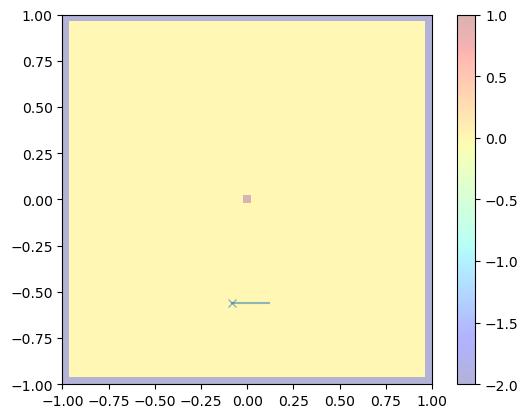

In [5]:
points = dlaRandomWalk(X,Y,matrix,npoints=1,nsteps=6,seed=111,weights = [1,1,97,1])

In [6]:
interactive_plot = interactive(dlaRandomWalk,
                               X = fixed(X),Y = fixed(Y), matrix = fixed(matrix), 
                               npoints=widgets.IntSlider(min=1,max=5,step=1,value=3,description='npoints'),
                               nsteps=widgets.IntSlider(min=50,max=2000,step=50,value=300,description='nsteps'),
                               seed=widgets.IntSlider(min=10,max=100,step=1,value=12,description='seed')
                              )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=3, description='npoints', max=5, min=1), IntSlider(value=300, descriptio…

Literature:

- [Physics today](https://web.archive.org/web/20070405094836/http://aip.org/pt/vol-53/iss-11/p36.html)

----